# Regression Models on Student Performance & Ice Cream Sales
 
 This notebook demonstrates how to build and evaluate regression models using **scikit-learn**:
 - **Part A**: Linear Regression on Student Performance dataset
 - **Part B**: Polynomial Regression on Ice Cream Sales dataset

 We will use appropriate evaluation metrics for each model:
 - Student Performance → MAE (Mean Absolute Error) + R²
 - Ice Cream Sales → RMSE (Root Mean Squared Error) + R²

In [20]:
import pandas as pd  # For data handling
import numpy as np  # For numerical operations
from sklearn.model_selection import train_test_split  # For splitting dataset into train and test
from sklearn.linear_model import LinearRegression  # For linear regression model
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder  # For polynomial regression & encoding categorical variables
from sklearn.pipeline import make_pipeline  # To chain preprocessing + model together
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # For regression evaluation metrics
import matplotlib.pyplot as plt  # For plotting results

## Part A: Linear Regression on Student Performance
 The goal is to predict a student's **Performance Index** based on study-related features.
 We will evaluate the model using:
 - **MAE**: Average prediction error in exam points.
 - **R²**: Variance explained by the model.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

# Load dataset into a pandas DataFrame
# student_df = 

# Encode categorical column 'Extracurricular Activities' into numeric values (Yes/No → 1/0)
# le = 
# student_df["Extracurricular Activities"] = 

# Separate features (X) and target (y)
# X_student =   # All columns except target
# y_student = # Target column

# Split dataset into training (80%) and testing (20%)
# X_train, X_test, y_train, y_test = 

# Initialize linear regression model
# lin_reg = 

# Train the model using training data

# Make predictions on test data
# y_pred = 

# Evaluate model with MAE (average error in exam points)
# mae_student = 

# Evaluate model with R^2 (variance explained)
# r2_student = r2_score(y_test, y_pred) 

# Print evaluation results
print("Student Performance Model:")
print("MAE (average error in exam points):", mae_student)
print("R^2 (variance explained):", r2_student)

In [41]:
# Load dataset into a pandas DataFrame
student_df = pd.read_csv("student_performance.csv")  # Replace with your actual file path

# Encode categorical column 'Extracurricular Activities' into numeric values (Yes/No → 1/0)
le = LabelEncoder()
student_df["Extracurricular Activities"] = le.fit_transform(student_df["Extracurricular Activities"])

# Separate features (X) and target (y)
X_student = student_df.drop("Performance Index", axis=1)
y_student = student_df["Performance Index"]

# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X_student, y_student, test_size=0.2, random_state=120)

# Initialize linear regression model
lin_reg = LinearRegression()

# Train the model using training data
lin_reg.fit(X_train, y_train)

# Make predictions on test data
y_pred = lin_reg.predict(X_test)

# Evaluate model with MAE (average error in exam points)
mae_student = mean_absolute_error(y_test, y_pred)

# Evaluate model with R^2 (variance explained)
r2_student = r2_score(y_test, y_pred)

# Print evaluation results
print("Student Performance Model:")
print("MAE (average error in exam points):", mae_student)
print("R^2 (variance explained):", r2_student)

Student Performance Model:
MAE (average error in exam points): 1.5786035338005096
R^2 (variance explained): 0.9889498878707359


## Part B: Polynomial Regression on Ice Cream Sales
 The goal is to predict **Ice Cream Sales** from **Temperature (°C)**.
 Polynomial regression is used since the relationship is nonlinear.
 We evaluate using:
 - **RMSE**: Typical prediction error, penalizing large mistakes.
 - **R²**: Variance explained by the model.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()
# Load dataset into a pandas DataFrame
# icecream_df = 

# Define feature (temperature) and target (ice cream sales)
# X_ice =   # Double brackets keep it as DataFrame
# y_ice = 

# Split dataset into training (80%) and testing (20%)
# X_train, X_test, y_train, y_test = 

# Create a polynomial regression model pipeline (degree=2)
# Step 1: Transform input into polynomial features
# Step 2: Apply linear regression on the transformed features
# poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

# Train polynomial regression model on training data

# Make predictions on test data
# y_pred_poly

# Evaluate model with RMSE (penalizes large errors)
# rmse_ice

# Evaluate model with R^2 (variance explained)
# r2_ice = r2_score(y_test, y_pred_poly)

# Print evaluation results
print("\nIce Cream Sales Model (Polynomial Regression):")
print("RMSE (typical error size, penalizing big mistakes):", rmse_ice)
print("R^2 (variance explained):", r2_ice)

In [40]:
# Load dataset into a pandas DataFrame
icecream_df = pd.read_csv("Ice_cream selling data.csv")

# Define feature (temperature) and target (ice cream sales)
X_ice = icecream_df[["Temperature (°C)"]]
y_ice = icecream_df["Ice Cream Sales (units)"]

# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X_ice, y_ice, test_size=0.2, random_state=20)

# Create a polynomial regression model pipeline (degree=2)
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

# Train polynomial regression model on training data
poly_model.fit(X_train, y_train)

# Make predictions on test data
y_pred_poly = poly_model.predict(X_test)

# Evaluate model with RMSE (penalizes large errors)
rmse_ice = np.sqrt(mean_squared_error(y_test, y_pred_poly))

# Evaluate model with R^2 (variance explained)
r2_ice = r2_score(y_test, y_pred_poly)

# Print evaluation results
print("\nIce Cream Sales Model (Polynomial Regression):")
print("RMSE (typical error size, penalizing big mistakes):", rmse_ice)
print("R^2 (variance explained):", r2_ice)


Ice Cream Sales Model (Polynomial Regression):
RMSE (typical error size, penalizing big mistakes): 2.8311937856817213
R^2 (variance explained): 0.9568457914775634


c:\Users\Student\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


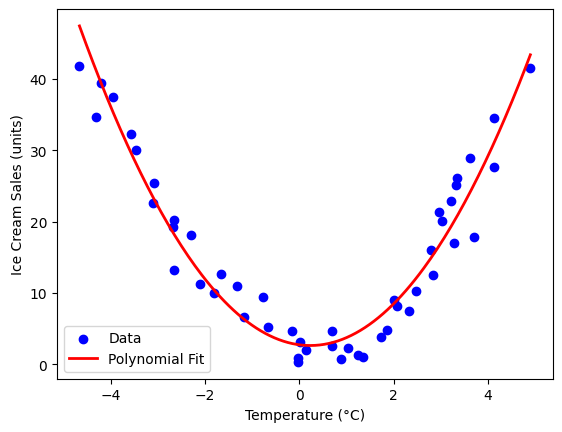

In [42]:
# ### Visualization
# Let's visualize the polynomial regression curve along with the actual data points.
plt.scatter(X_ice, y_ice, color="blue", label="Data")  # Scatter plot of actual data
x_range = np.linspace(X_ice.min(), X_ice.max(), 200).reshape(-1,1)  # Generate smooth range of X values
y_range = poly_model.predict(x_range)  # Predict sales for smooth range
plt.plot(x_range, y_range, color="red", linewidth=2, label="Polynomial Fit")  # Plot polynomial curve
plt.xlabel("Temperature (°C)")
plt.ylabel("Ice Cream Sales (units)")
plt.legend()
plt.show()